In [1]:
import sys
sys.path.append('../..')

import numpy as np
from sklearn import datasets
import sklearn.ensemble
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

import lime.lime_tabular
from density_lime.lime_tabular_manifold import LimeTabularExplainerManifold
from sklearn.linear_model import HuberRegressor as Linear

In [2]:
data = datasets.load_iris()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data.data, data.target, train_size=0.80)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## Training a Model

In [3]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)

In [4]:
print('Random Forest MSError: ', np.mean((rf.predict(x_test) - y_test) ** 2))
print('MSError when predicting the mean: ', np.mean((y_train.mean() - y_test) ** 2))

Random Forest MSError:  0.03333333333333333
MSError when predicting the mean:  0.5822916666666667


## Explantion

# TODO:
Plotar esses graficos com o modelo de ml e nao o real.

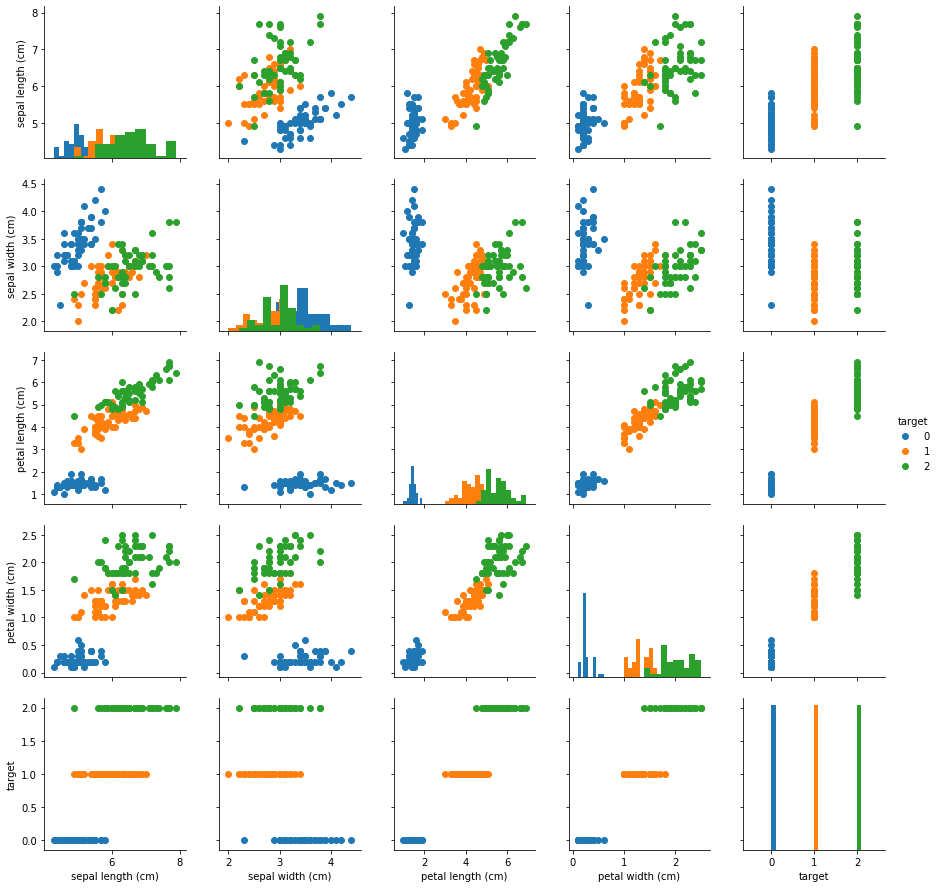

In [5]:
g = sns.PairGrid(df.sample(frac=1.0), hue='target') #, hue=12)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()


In [6]:
categorical_features = []

In [7]:
i = 3
x_explain = x_test[i]
x_explain = np.array([6.1, 2.8, 4.7, 1.2])
y_explain = 1
x_explain,y_explain, rf.predict(x_explain.reshape(1, -1))

(array([6.1, 2.8, 4.7, 1.2]), 1, array([1]))

## Lime Standard Explantion

In [8]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names=data.feature_names, class_names=data.target_names, categorical_features=categorical_features, verbose=True, mode='classification')

In [9]:
exp = explainer.explain_instance(x_explain, rf.predict_proba, num_features=4, model_regressor=Linear())

Intercept 0.24524417031497983
Prediction_local [0.66398557]
Right: 0.98


In [10]:
exp.show_in_notebook(show_table=True)

## Lime KDE Explantion

In [11]:
explainer_mani = LimeTabularExplainerManifold(x_train, sample_around_instance=True, manifold='kde', feature_names=data.feature_names, class_names=data.target_names, categorical_features=categorical_features, verbose=True, mode='classification')

Best Parameter for the KDE:
{'bandwidth': 0.2822222222222222}
Score: -74.39817336234346


In [12]:
exp_mani = explainer_mani.explain_instance_manifold(
    x_explain, rf.predict_proba, num_features=4, n_min_kernels=20, model_regressor=Linear())

Intercept 2.342756276142458
Prediction_local [0.79775729]
Right: 0.98


In [13]:
exp_mani.show_in_notebook(show_table=True)

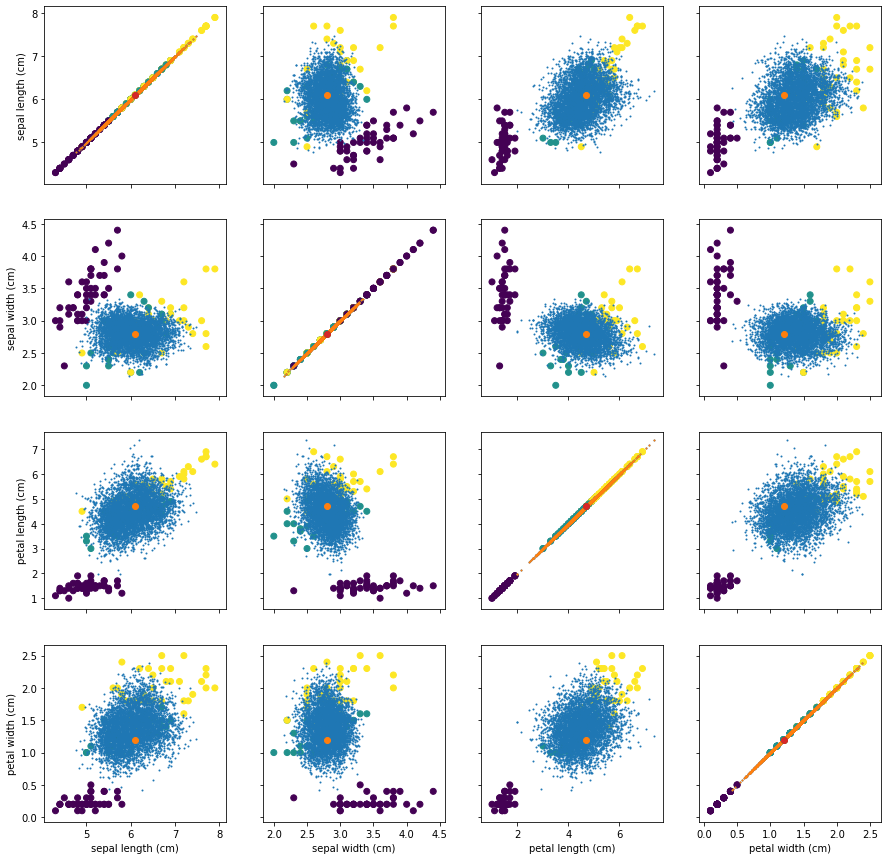

In [14]:
ax, cp = explainer_mani.plot(x_train, figsize=(15, 15), y=y_train_pred)
explainer_mani.plot_samples(ax)
explainer_mani.plot(x_explain.reshape(1, -1), ax)
plt.show()

In [15]:
# g = sns.PairGrid(df.sample(frac=1.0), hue='target') #, hue=12)
# g = g.map_diag(plt.hist)
# g = g.map_offdiag(plt.scatter)
# g = g.add_legend()

## Lime KDE-PCA Explantion

# TODO: use the accumulated varience to select the n_components of the PCA

In [17]:
explainer_mani = LimeTabularExplainerManifold(x_train, sample_around_instance=True, manifold='kde-pca', feature_names=data.feature_names, class_names=data.target_names, categorical_features=categorical_features, verbose=True, mode='classification')

Best Parameter for the KDE:
{'bandwidth': 0.33666666666666667}
Score: -67.299464408806


In [18]:
exp_mani = explainer_mani.explain_instance_manifold(
    x_explain, rf.predict_proba, num_features=4, n_min_kernels=20)

Intercept 2.3499590441052502
Prediction_local [0.81376092]
Right: 0.98


/home/tiago/anaconda3/envs/density-lime3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.98998e-18): result may not be accurate.
  overwrite_a=True).T


In [19]:
exp_mani.show_in_notebook(show_table=True)

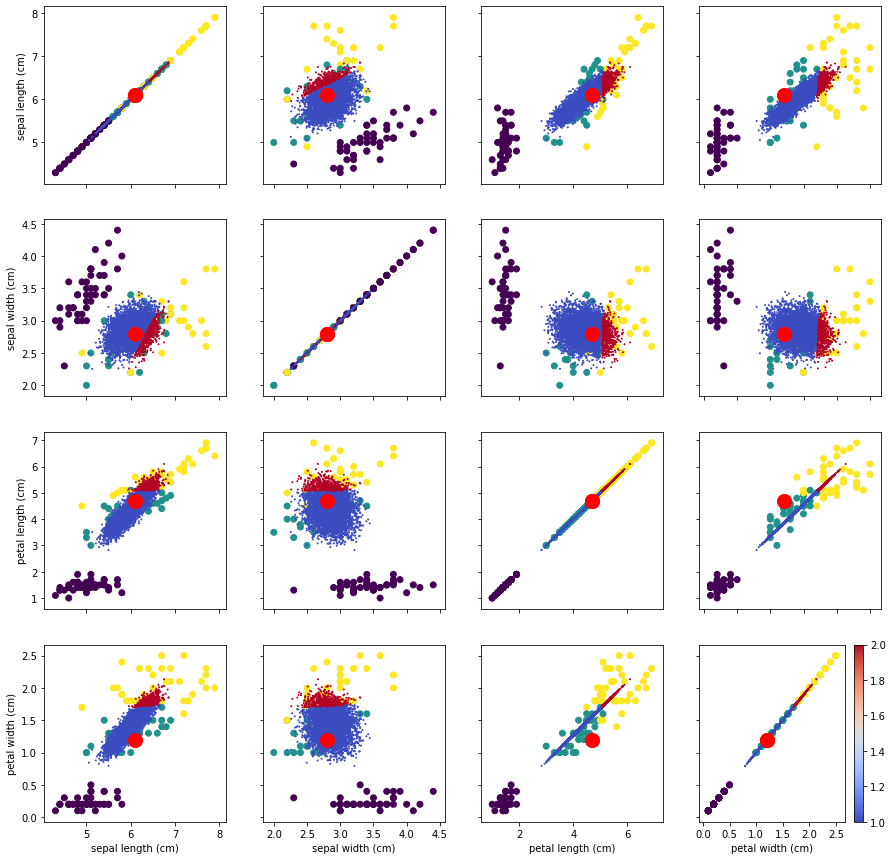

In [20]:
ax, cp = explainer_mani.plot(x_train,  figsize=(15, 15), y=y_train_pred)
ax, cp = explainer_mani.plot_samples(ax, model=rf, cmap='coolwarm')
explainer_mani.plot(x_explain.reshape(1, -1), ax, s=200, y='red')
plt.colorbar(cp)
plt.show()

In [21]:
explainer_mani.manifold.sample()

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

## Lime KDE-Kernel-PCA Explantion

In [ ]:
explainer_mani = LimeTabularExplainerManifold(x_train, sample_around_instance=True, manifold='kernel-pca-kde', feature_names=data.feature_names, class_names=data.target_names, categorical_features=categorical_features, verbose=True, mode='classification')

In [ ]:
exp_mani = explainer_mani.explain_instance_manifold(
    x_explain, rf.predict_proba, num_features=4, n_min_kernels=20
    , model_regressor=Linear())

In [ ]:
exp_mani.show_in_notebook(show_table=True)

In [ ]:
ax, cp = explainer_mani.plot(x_train,  figsize=(15, 15), y=y_train_pred)
ax, cp = explainer_mani.plot_samples(ax, model=rf, cmap='coolwarm')
explainer_mani.plot(x_explain.reshape(1, -1), ax, s=200, y='red')
plt.colorbar(cp)
plt.show()